In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [2]:
data=open("/Users/Roslyn/Desktop/run-XXXII", "r")

In [3]:
#checking file read in correctly 
print(data.readline()) 

channel names:			



In [4]:
#skipping first few lines to get to data 
with data as f:
    lines_after_6 = f.readlines()[6:]

In [5]:
#checking lines_after_6 starts with/contains correct values
print(lines_after_6[0])

-9.734519E-1	-1.183270E+0	-5.544600E-1	-9.808648E-1



In [6]:
#checking number of lines
#print(len(lines_after_6))
#print(lines_after_6[0][0:12])

In [7]:
#for each line, break the string at first separator, take the first value and attach it to result
#first column
result0=[]
for x in lines_after_6:
    result0.append(x.split()[0])
#f.close()

In [8]:
#second column
result1=[]
for x in lines_after_6:
    result1.append(x.split()[1])

In [9]:
#checking result list contains correct values
#print(len(result))
print(result0[0])
print(result1[0])

-9.734519E-1
-1.183270E+0


In [10]:
#need to convert values in result lists from strings to numbers in order to combine 
#type(result0[0])

In [11]:
fresult0=[]
for i in result0:
    fresult0.append(float(i))
    

In [12]:
#type(fresult0[0])
#print(len(fresult0))

In [13]:
fresult1=[]
for i in result1:
    fresult1.append(float(i))

In [14]:
#combine real and im to form array of complex numbers 
comb=np.vectorize(complex)(fresult0, fresult1)

In [15]:
#use first 100 values initially 
first100=comb[:100]

In [16]:
#plt.plot(first100)
print(len(first100))
print(first100[0])
print(first100[1])


100
(-0.9734519-1.18327j)
(0.4169567-1.035656j)


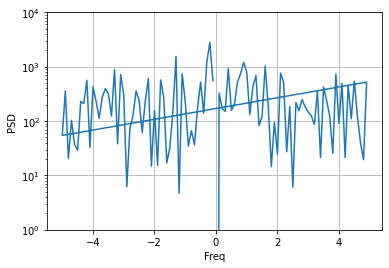

In [17]:
#PSD 
#power response is the abs value of the FFT

F=np.fft.fft(first100-np.mean(first100))
P=np.square(abs(F))

#create s axis in Fourier plane (same size as set and with sampling freq at least max freq x2)
s=np.fft.fftfreq(100, 0.1)

plt.semilogy(s,P)
plt.xlabel('Freq')
plt.ylabel('PSD')
plt.ylim(1,10000)
plt.grid(True)

In [18]:
first1000=comb[:1000]

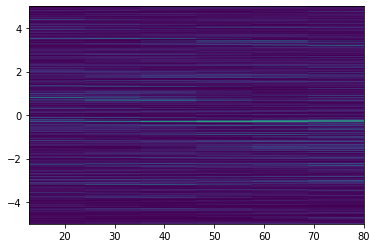

In [19]:
#spectrogram - two sided?
f, t, Sxx = signal.spectrogram(first1000-np.mean(first1000), 10, nfft=3000, return_onesided=False)
plt.pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0), shading='gouraud')
plt.show()

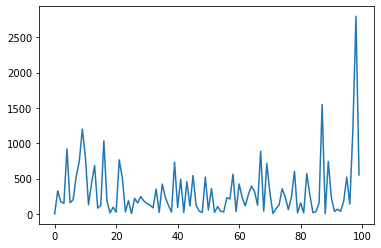

In [20]:
plt.plot(P)

In [21]:
batches = [comb[x:x+100] for x in range(0, len(comb), 100)]

In [22]:
#checking batches worked
print(batches[0][0])
print(batches[1][0])
#print(comb[100])
#print(batches[2][0])
#print(comb[200])

(-0.9734519-1.18327j)
(0.2796562+2.248918j)


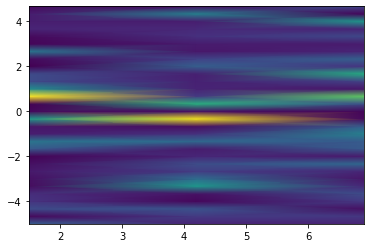

In [23]:
f, t, Sxx = signal.spectrogram(batches[0]-np.mean(batches[0]), 10, nperseg=30, return_onesided=False)
plt.pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0), shading='gouraud')
plt.show()

In [24]:
print(len(batches))
print(len(comb))

240890
24089000


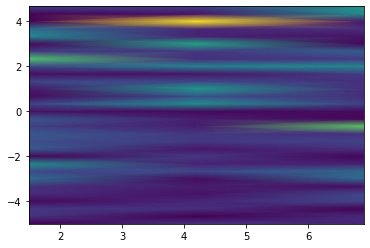

In [25]:
f1, t1, Sxx1 = signal.spectrogram(batches[1]-np.mean(batches[1]), 10, nperseg=30, return_onesided=False)
plt.pcolormesh(t1, fftshift(f1), fftshift(Sxx1, axes=0), shading='gouraud')
plt.show()

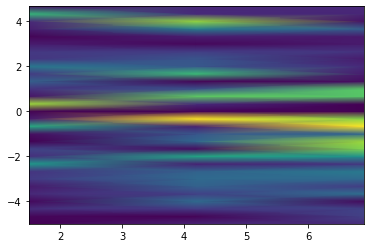

In [26]:
f2, t2, Sxx2 = signal.spectrogram(batches[2]-np.mean(batches[2]), 10, nperseg=30, return_onesided=False)
plt.pcolormesh(t2, fftshift(f2), fftshift(Sxx2, axes=0), shading='gouraud')
plt.show()

In [27]:
#checking mean works for complex
#print(np.mean([batches[0][0], batches[1][0]]))

In [28]:
#want list which is the average of the first 20 lists 

#avg=[]
#for i in range(0,99):
#    avg.append(np.mean(batches[0:19][i]))

In [29]:
#print(batches[0][0:3]) worked 
#print(batches[0:3][1]) didnt work - just printed batches[1]

rows0 = []
for i in range(0,20):
    rows0.append(batches[i][0])


In [30]:
#check that rows0 is a list of the 0th item in the first 20 lists within batches 
#works but need this 100 times 
#print(batches[0][0])
#print(batches[1][0])
#print(batches[2][0])
#print(batches[19][0])

#print(len(rows0))
#print(rows0)
print(np.mean(rows0))

(0.26428254-0.019810150999999967j)


In [34]:
#avg20 is a list of the average of the first 20 lists within batches 
#first row is avg of batches[0][0] to batches[20[0]] and so on)

avg20=[]
slice1=[]

for i in range(0,100):
    slice1.clear()
    for j in range(0,20):
        slice1.append(batches[j][i])
    avg20.append(np.mean(slice1[:]))

In [35]:
#checking this worked
print(len(avg20))
print(avg20[0]) #matches rows0 yay

100
(0.26428254-0.019810150999999967j)


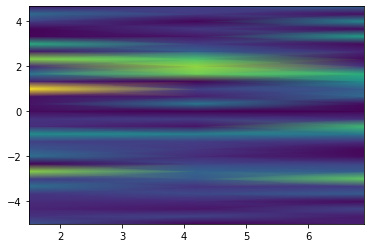

In [36]:
#spectrogram of the average of the first 20 batches of 100 data points
fav, tav, Sxxav = signal.spectrogram(avg20-np.mean(avg20), 10, nperseg=30, return_onesided=False)
plt.pcolormesh(tav, fftshift(fav), fftshift(Sxxav, axes=0), shading='gouraud')
plt.show()

In [37]:
#try average of first 10 sets of 100
avg10=[]
slice2=[]

for i in range(0,100):
    slice2.clear()
    for j in range(0,10):
        slice2.append(batches[j][i])
    avg10.append(np.mean(slice2[:]))

In [39]:
#print(len(avg10))

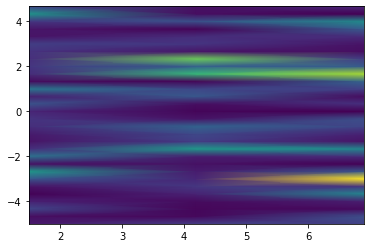

In [40]:
#spectrogram of the average of the first 10 batches of 100 data points
fav10, tav10, Sxxav10 = signal.spectrogram(avg10-np.mean(avg10), 10, nperseg=30, return_onesided=False)
plt.pcolormesh(tav10, fftshift(fav10), fftshift(Sxxav10, axes=0), shading='gouraud')
plt.show()